In [1]:
pip install numpy matplotlib tensorflow keras



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [3]:
IMAZE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 20
CLASS_NAMES = [
    'Arive-Dantu', 'Basale', 'Betel', 'Crape_Jasmine', 'Curry', 'Drumstick', 
    'Fenugreek', 'Guava', 'Hibiscus', 'Indian_Beech', 'Indian_Mustard', 'Jackfruit', 
    'Jamaica_Cherry-Gasagase', 'Jamun', 'Jasmine', 'Karanda', 'Lemon', 'Mango', 
    'Mexican_Mint', 'Mint', 'Neem', 'Oleander', 'Parijata', 'Peepal', 'Pomegranate', 
    'Rasna', 'Rose_apple', 'Roxburgh_fig', 'Sandalwood', 'Tulsi'
]

In [4]:
import tensorflow as tf

IMAGE_SIZE = 256
BATCH_SIZE = 32

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "D:\Identification_plant\dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)



Found 14380 files belonging to 30 classes.


In [5]:
class_names = dataset.class_names
class_names

['Arive-Dantu',
 'Basale',
 'Betel',
 'Crape_Jasmine',
 'Curry',
 'Drumstick',
 'Fenugreek',
 'Guava',
 'Hibiscus',
 'Indian_Beech',
 'Indian_Mustard',
 'Jackfruit',
 'Jamaica_Cherry-Gasagase',
 'Jamun',
 'Jasmine',
 'Karanda',
 'Lemon',
 'Mango',
 'Mexican_Mint',
 'Mint',
 'Neem',
 'Oleander',
 'Parijata',
 'Peepal',
 'Pomegranate',
 'Rasna',
 'Rose_apple',
 'Roxburgh_fig',
 'Sandalwood',
 'Tulsi']

In [6]:
len(dataset)


450

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[ 6 26  3  6  4 21 23 12 16  7 25 16 14  2 26  7  8 16 28 29  4 20 15 14
 13 27 24 12 25 10 15 16]


In [8]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import numpy as np


In [10]:
import numpy as np

for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)  # Print the shape of the image batch
  print(label_batch.numpy())  # Convert the label batch to a NumPy array


(32, 256, 256, 3)
[27 27  5 25 29 16 27  0 29  9 11 27  3 18  6 17  0 28 24 21  1 28 23 17
 29 29 10 28  1 10 23 13]


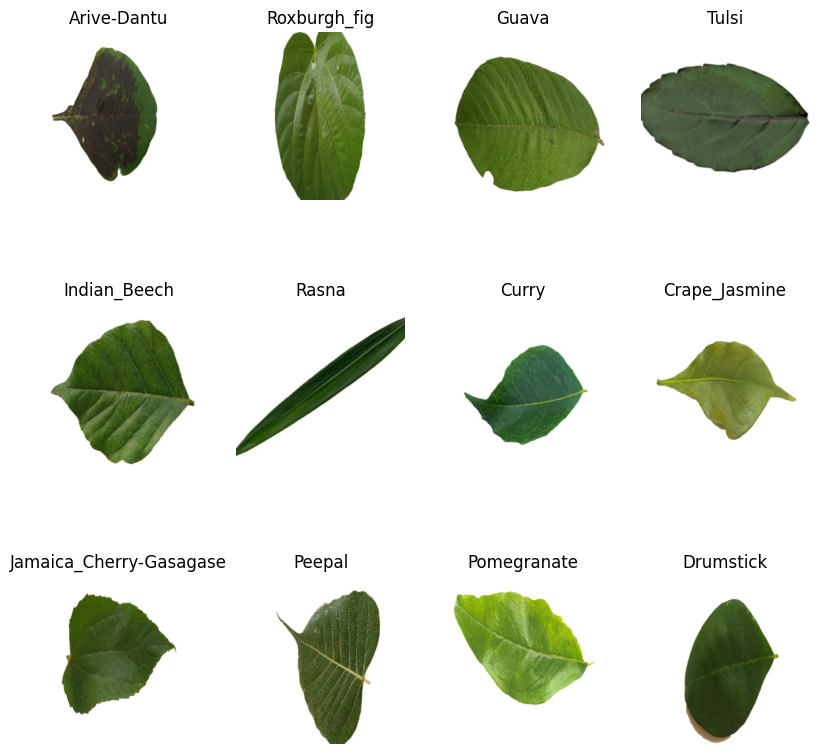

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
  for i in range(min(12, len(image_batch))):  # Adjust the range based on batch size
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")



In [12]:
len(dataset)

450

In [13]:
total_batches = tf.data.experimental.cardinality(dataset).numpy()

In [14]:
# Calculate the number of batches for each split
train_batches = int(0.8 * total_batches)
val_batches = int(0.1 * total_batches)
test_batches = int(0.1 * total_batches)

In [15]:
dataset = dataset.take(1000)

In [16]:
# Split the dataset
train_dataset = dataset.take(train_batches)
val_dataset = dataset.skip(train_batches).take(val_batches)
test_dataset = dataset.skip(train_batches + val_batches).take(test_batches)

In [17]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [18]:
len(train_dataset)

360

In [19]:
len(val_dataset)

45

In [20]:
len(test_dataset)

45

In [21]:
import tensorflow as tf
from tensorflow.keras import layers
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

In [22]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [23]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(CLASS_NAMES)

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # Reduced dense layers
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.build(input_shape = input_shape)

C:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 57600)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 128)                   │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (32, 128)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 30)                    │           3,870 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,433,118 (28.36 MB)

 Trainable params: 7,433,118 (28.36 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Enable GPU usage if available
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [26]:
# Train the model
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=val_dataset
)

Epoch 1/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 440s 1s/step - accuracy: 0.1336 - loss: 3.0326 - val_accuracy: 0.4556 - val_loss: 1.8682
Epoch 2/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 438s 1s/step - accuracy: 0.3683 - loss: 2.0645 - val_accuracy: 0.6681 - val_loss: 1.1275
Epoch 3/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 444s 1s/step - accuracy: 0.5097 - loss: 1.5657 - val_accuracy: 0.7479 - val_loss: 0.8591
Epoch 4/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 445s 1s/step - accuracy: 0.5769 - loss: 1.3329 - val_accuracy: 0.7771 - val_loss: 0.7077
Epoch 5/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 454s 1s/step - accuracy: 0.6275 - loss: 1.1549 - val_accuracy: 0.8354 - val_loss: 0.5150
Epoch 6/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 449s 1s/step - accuracy: 0.6740 - loss: 1.0157 - val_accuracy: 0.8472 - val_loss: 0.4708
Epoch 7/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 447s 1s/step - accuracy: 0.6883 - loss: 0.9408 - val_accuracy: 0.8625 - val_loss: 0.4495
Epoch 8/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 445s 1s/step - accuracy: 0.7139 - loss: 0.8811 - val_accu

In [27]:
loss, accuracy = model.evaluate(test_dataset)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

45/45 ━━━━━━━━━━━━━━━━━━━━ 33s 352ms/step - accuracy: 0.9561 - loss: 0.1413
Test Loss: 0.16316059231758118
Test Accuracy: 0.9464788436889648


In [28]:
history

In [29]:
history.params

{'verbose': 'auto', 'epochs': 20, 'steps': 360}

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

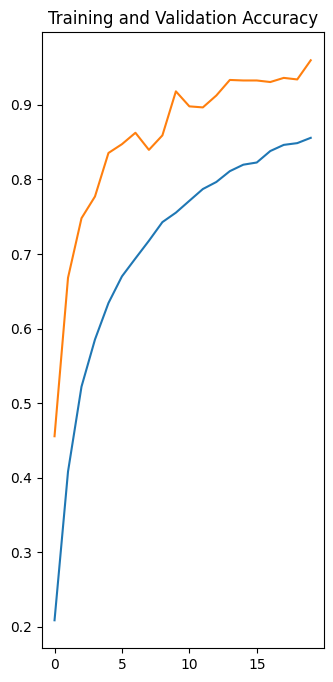

In [32]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.title('Training and Validation Accuracy')

First image to predict


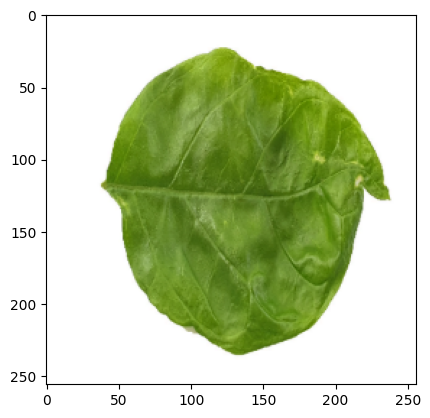

First image's actual label:  Jasmine
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
Predicted class probabilities:  [2.2896320e-12 6.6545022e-15 4.1414620e-07 1.2958741e-07 3.8125770e-24
 2.4460116e-14 1.5183318e-25 1.2372111e-07 8.2841163e-25 5.6630767e-09
 1.9047026e-28 1.7702798e-27 1.1922262e-08 1.7737294e-32 8.9891052e-01
 3.3496435e-23 6.6210948e-10 3.7966343e-20 2.6285231e-12 1.2736481e-08
 6.1501529e-25 0.0000000e+00 3.4392000e-26 1.7629681e-19 1.0087516e-01
 6.7665553e-27 0.0000000e+00 2.1359457e-04 1.4389537e-18 1.8231222e-16]
Predicted class:  Jasmine


In [35]:
for images_batch, labels_batch in test_dataset.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("First image to predict")
    plt.imshow(first_image)
    plt.show()
    
    print("First image's actual label: ", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    predicted_probabilities = batch_prediction[0]
    predicted_class_index = np.argmax(predicted_probabilities)
    predicted_class_name = class_names[predicted_class_index]
    
    print("Predicted class probabilities: ", predicted_probabilities)
    print("Predicted class: ", predicted_class_name)

    

In [37]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array  = tf.expand_dims(img_array , 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class ,  confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


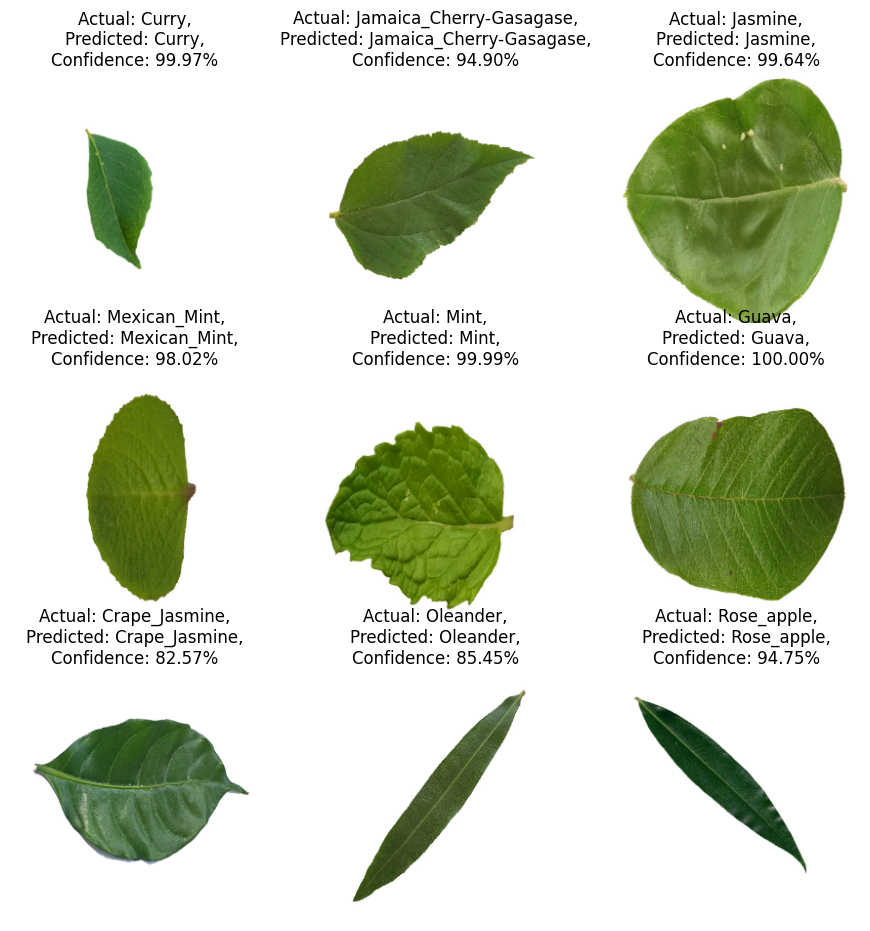

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def predict(model, image):
    # Add batch dimension
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)
    predicted_class_index = np.argmax(prediction[0])
    predicted_class_name = class_names[predicted_class_index]
    confidence = prediction[0][predicted_class_index] * 100  # Convert to percentage
    return predicted_class_name, confidence

plt.figure(figsize=(11, 11))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class},\nConfidence: {confidence:.2f}%")
        plt.axis("off")
plt.show()


In [47]:
import os


model_directory = "D:/Identification_plant/models"
model_version = 1
model_filename = f"model_version_{model_version}.keras" 
model_path = os.path.join(model_directory, model_filename)


os.makedirs(model_directory, exist_ok=True)

# Save the model
model.save(model_path)

print(f"Model saved to {model_path}")



Model saved to D:/Identification_plant/models\model_version_1.keras
